# Pattern Recognition
## Assignment 01

### Question 01
#### Linear Regression Impact on Outliers


Slope m: -3.56, Intercept b: 3.92


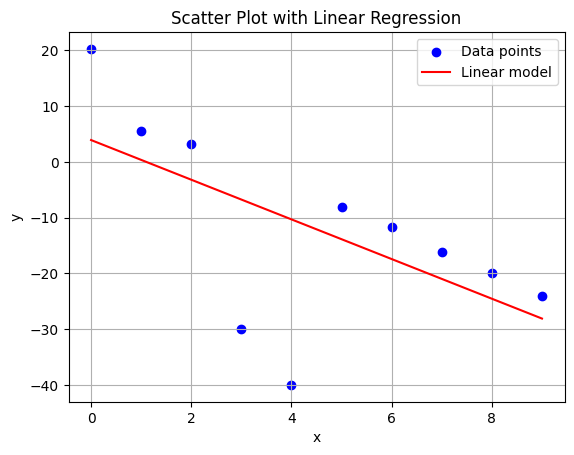

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#Part 1,2 - using numpy
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
y = np.array([20.26, 5.61, 3.14, -30.00, -40.00, -8.13, -11.73, -16.08, -19.95, -24.03])

# Fit linear regression using numpy 
m, b = np.polyfit(x, y, 1)  # Degree 1 for linear
print(f"Slope m: {m:.2f}, Intercept b: {b:.2f}")

# Plot
plt.scatter(x, y, color='blue', label='Data points')
plt.plot(x, m*x + b, color='red', label='Linear model')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter Plot with Linear Regression')
plt.legend()
plt.grid(True)
plt.show()

In [9]:
#Part 3,4
#Model 1: y=-4x+12
#Model 2: y=-3.55x+3.91


N = len(x)

# Model 1: m=-4, b=12
def compute_L(m, b,beta):
    y_hat = m * x + b
    residuals = y - y_hat
    terms = (residuals**2) / (residuals**2 + beta**2)
    return np.mean(terms)
    

betas = [1, 1e-6, 1e3]

print("Model 1 (y = -4x + 12):")
for beta in betas:
    L = compute_L(-4, 12,beta)
    print(f"β={beta}: L={L:.8f}")

print("\nModel 2 (y = -3.55x + 3.91):")
for beta in betas:
    L = compute_L(-3.55, 3.91,beta)
    print(f"β={beta}: L={L:.8f}")

Model 1 (y = -4x + 12):
β=1: L=0.43541626
β=1e-06: L=1.00000000
β=1000.0: L=0.00022683

Model 2 (y = -3.55x + 3.91):
β=1: L=0.97284705
β=1e-06: L=1.00000000
β=1000.0: L=0.00018825


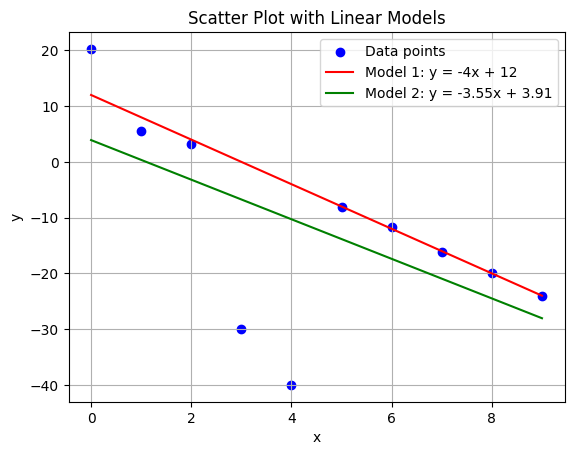

In [10]:

# Data from Table 1
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
y = np.array([20.26, 5.61, 3.14, -30.00, -40.00, -8.13, -11.73, -16.08, -19.95, -24.03])

# Model 1: y = -4x + 12
# Model 2: y = -3.55x + 3.91
model1_m, model1_b = -4, 12
model2_m, model2_b = -3.55, 3.91

# Calculate predicted values
y_model1 = model1_m * x + model1_b
y_model2 = model2_m * x + model2_b

# Plot
plt.scatter(x, y, color='blue', label='Data points')
plt.plot(x, y_model1, color='red', label='Model 1: y = -4x + 12')
plt.plot(x, y_model2, color='green', label='Model 2: y = -3.55x + 3.91')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter Plot with Linear Models')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#Part 8

# Huber loss function
def huber_loss(residuals, delta=1.0):
    residuals = np.abs(residuals)  # Absolute residuals
    is_small_error = residuals <= delta
    small_error_loss = 0.5 * residuals**2
    large_error_loss = delta * (residuals - 0.5 * delta)
    return np.where(is_small_error, small_error_loss, large_error_loss)

# Compute Huber loss for a model
def compute_huber_loss(m, b, delta=1.0):
    y_hat = m * x + b
    residuals = y - y_hat
    huber_terms = huber_loss(residuals, delta)
    return np.mean(huber_terms)

# Calculate losses
delta = 1.0  # Huber parameter
huber_loss_model1 = compute_huber_loss(model1_m, model1_b, delta)
huber_loss_model2 = compute_huber_loss(model2_m, model2_b, delta)

# Print results
print(f"Huber Loss (δ={delta}):")
print(f"Model 1 (y = -4x + 12): {huber_loss_model1:.4f}")
print(f"Model 2 (y = -3.55x + 3.91): {huber_loss_model2:.4f}")

Huber Loss (δ=1.0):
Model 1 (y = -4x + 12): 7.5070
Model 2 (y = -3.55x + 3.91): 10.0680


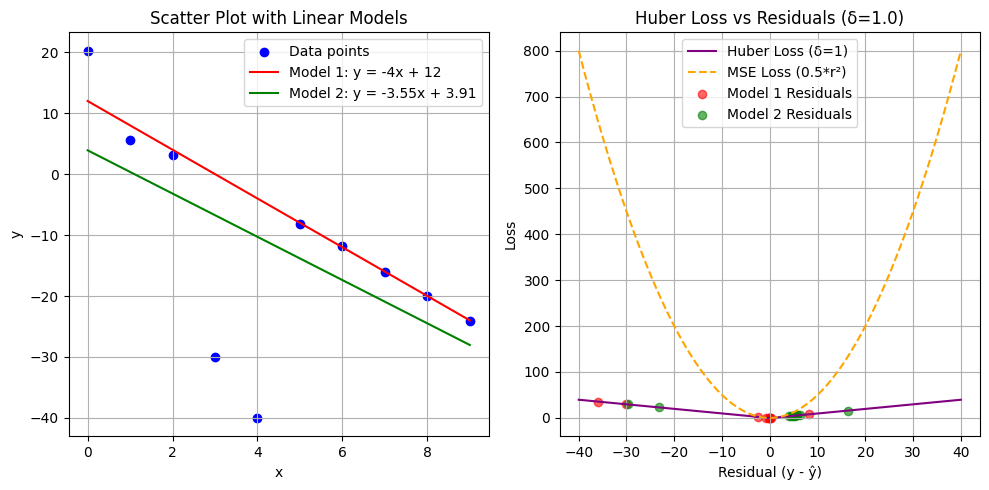

Total Huber Loss (δ=1.0):
Model 1 (y = -4x + 12): 7.5070
Model 2 (y = -3.55x + 3.91): 10.0680


In [12]:

# Compute residuals
residuals_model1 = y - y_model1
residuals_model2 = y - y_model2

# Compute Huber loss for each model
delta = 1.0
huber_loss_model1 = huber_loss(residuals_model1, delta)
huber_loss_model2 = huber_loss(residuals_model2, delta)
total_huber_loss_model1 = np.mean(huber_loss_model1)
total_huber_loss_model2 = np.mean(huber_loss_model2)

# Plot 1: Scatter plot with both models
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(x, y, color='blue', label='Data points')
plt.plot(x, y_model1, color='red', label='Model 1: y = -4x + 12')
plt.plot(x, y_model2, color='green', label='Model 2: y = -3.55x + 3.91')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter Plot with Linear Models')
plt.legend()
plt.grid(True)

# Plot 2: Huber loss vs residuals for both models
residual_range = np.linspace(-40, 40, 1000)  # Range covering observed residuals
huber_values = huber_loss(residual_range, delta)
mse_values = 0.5 * residual_range**2  # For comparison (MSE is 0.5*r^2 in Huber context)

plt.subplot(1, 2, 2)
plt.plot(residual_range, huber_values, label='Huber Loss (δ=1)', color='purple')
plt.plot(residual_range, mse_values, label='MSE Loss (0.5*r²)', color='orange', linestyle='--')
plt.scatter(residuals_model1, huber_loss_model1, color='red', label='Model 1 Residuals', alpha=0.6)
plt.scatter(residuals_model2, huber_loss_model2, color='green', label='Model 2 Residuals', alpha=0.6)
plt.xlabel('Residual (y - ŷ)')
plt.ylabel('Loss')
plt.title(f'Huber Loss vs Residuals (δ={delta})')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Print total Huber loss for comparison
print(f"Total Huber Loss (δ={delta}):")
print(f"Model 1 (y = -4x + 12): {total_huber_loss_model1:.4f}")
print(f"Model 2 (y = -3.55x + 3.91): {total_huber_loss_model2:.4f}")

In [15]:
import numpy as np

# Data from Table 1
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
y = np.array([20.26, 5.61, 3.14, -30.00, -40.00, -8.13, -11.73, -16.08, -19.95, -24.03])
N = len(x)

# Model parameters
model1_m, model1_b = -4, 12  # Model 1: y = -4x + 12
model2_m, model2_b = -3.55, 3.91  # Model 2: y = -3.55x + 3.91

# Compute residuals
y_model1 = model1_m * x + model1_b
y_model2 = model2_m * x + model2_b
residuals_model1 = y - y_model1
residuals_model2 = y - y_model2

# Huber loss function
def huber_loss(residuals, delta):
    residuals = np.abs(residuals)
    is_small_error = residuals <= delta
    small_error_loss = 0.5 * residuals**2
    large_error_loss = delta * (residuals - 0.5 * delta)
    return np.where(is_small_error, small_error_loss, large_error_loss)

# Compute losses for different delta values
delta_values = [0.5, 1.0, 5.0, 10.0]

print("Huber Loss for Different δ Values:")
print(f"{'δ':<10} {'Model 1':<15} {'Model 2':<15}")
print("-" * 40)

for delta in delta_values:
    loss_model1 = np.mean(huber_loss(residuals_model1, delta))
    loss_model2 = np.mean(huber_loss(residuals_model2, delta))
    print(f"{delta:<10.1f} {loss_model1:<15.4f} {loss_model2:<15.4f}")

Huber Loss for Different δ Values:
δ          Model 1         Model 2        
----------------------------------------
0.5        3.8180          5.1590         
1.0        7.5070          10.0680        
5.0        33.7076         40.4006        
10.0       59.7389         63.9491        


### Question 02
#### Loss Function

ŷ	MSE	BCE
0.005	0.9900	5.2983
0.01	0.9801	4.6052
0.05	0.9025	2.9957
0.1	0.8100	2.3026
0.2	0.6400	1.6094
0.3	0.4900	1.2040
0.4	0.3600	0.9163
0.5	0.2500	0.6931
0.6	0.1600	0.5108
0.7	0.0900	0.3567
0.8	0.0400	0.2231
0.9	0.0100	0.1054
1.0	0.0000	nan


C:\Users\Nilani Thushanthika\AppData\Local\Temp\ipykernel_13796\1595709856.py:5: RuntimeWarning: divide by zero encountered in log
  bce = - (y_true * np.log(y_preds) + (1 - y_true) * np.log(1 - y_preds))  # But since y=1, simplifies to -log(y_preds)
C:\Users\Nilani Thushanthika\AppData\Local\Temp\ipykernel_13796\1595709856.py:5: RuntimeWarning: invalid value encountered in multiply
  bce = - (y_true * np.log(y_preds) + (1 - y_true) * np.log(1 - y_preds))  # But since y=1, simplifies to -log(y_preds)


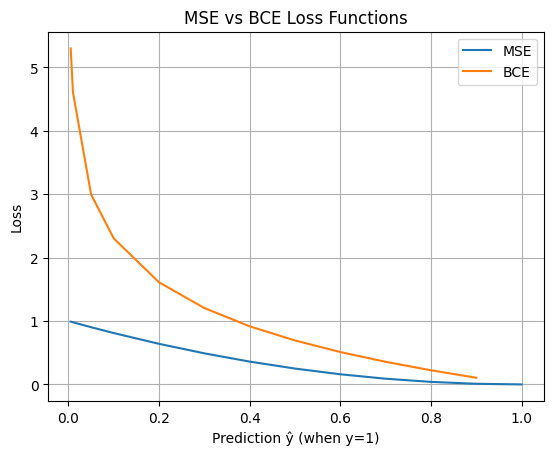

In [2]:


y_true = 1
y_preds = np.array([0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])

mse = (y_true - y_preds)**2
bce = - (y_true * np.log(y_preds) + (1 - y_true) * np.log(1 - y_preds))  # But since y=1, simplifies to -log(y_preds)

# Table (print or fill manually)
print("ŷ\tMSE\tBCE")
for pred, m, b in zip(y_preds, mse, bce):
    print(f"{pred}\t{m:.4f}\t{b:.4f}")

# Plot
plt.plot(y_preds, mse, label='MSE')
plt.plot(y_preds, bce, label='BCE')
plt.xlabel('Prediction ŷ (when y=1)')
plt.ylabel('Loss')
plt.title('MSE vs BCE Loss Functions')
plt.legend()
plt.grid(True)
plt.show()

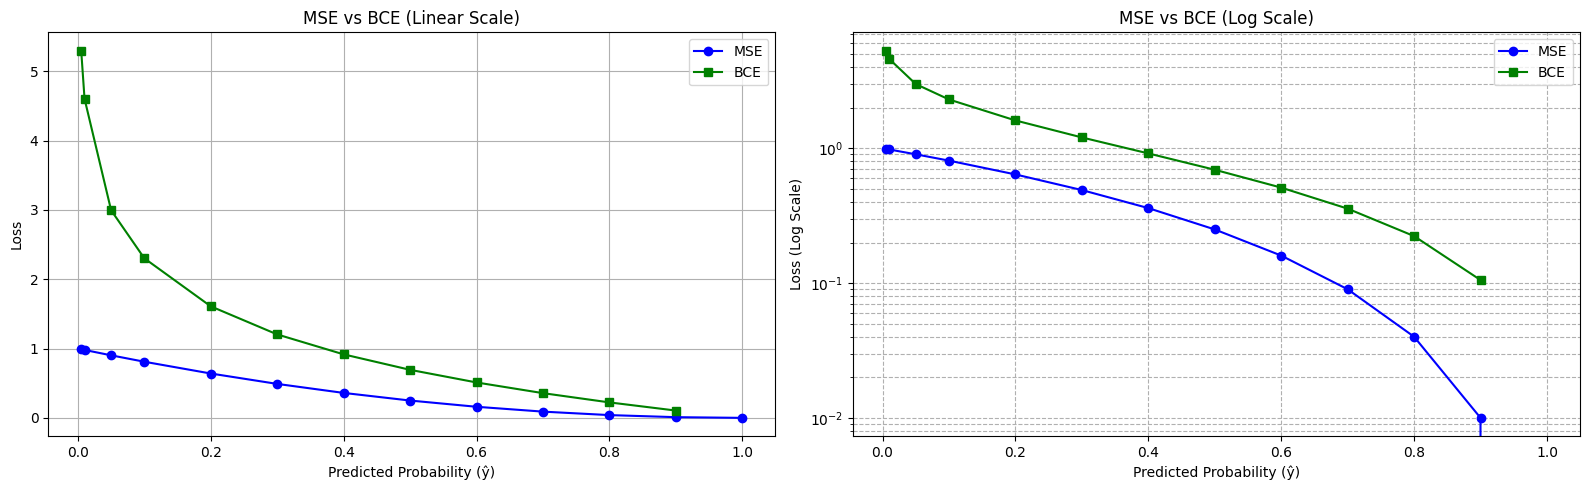

In [6]:

# Create side-by-side plots with expanded width
plt.figure(figsize=(16, 5))  # Increased width from 12 to 16

# Linear scale subplot
plt.subplot(1, 2, 1)
plt.plot(y_preds, mse, label='MSE', color='blue', marker='o')
plt.plot(y_preds, bce, label='BCE', color='green', marker='s')
plt.xlabel('Predicted Probability (ŷ)')
plt.ylabel('Loss')
plt.title('MSE vs BCE (Linear Scale)')
plt.legend()
plt.grid(True)

# Log scale subplot
plt.subplot(1, 2, 2)
plt.plot(y_preds, mse, label='MSE', color='blue', marker='o')
plt.plot(y_preds, bce, label='BCE', color='green', marker='s')
plt.yscale('log')
plt.xlabel('Predicted Probability (ŷ)')
plt.ylabel('Loss (Log Scale)')
plt.title('MSE vs BCE (Log Scale)')
plt.legend()
plt.grid(True, which="both", ls="--")

plt.tight_layout()
plt.savefig('mse_bce_plots.png')
plt.show()

### Question 03
#### Data Pre-Processing

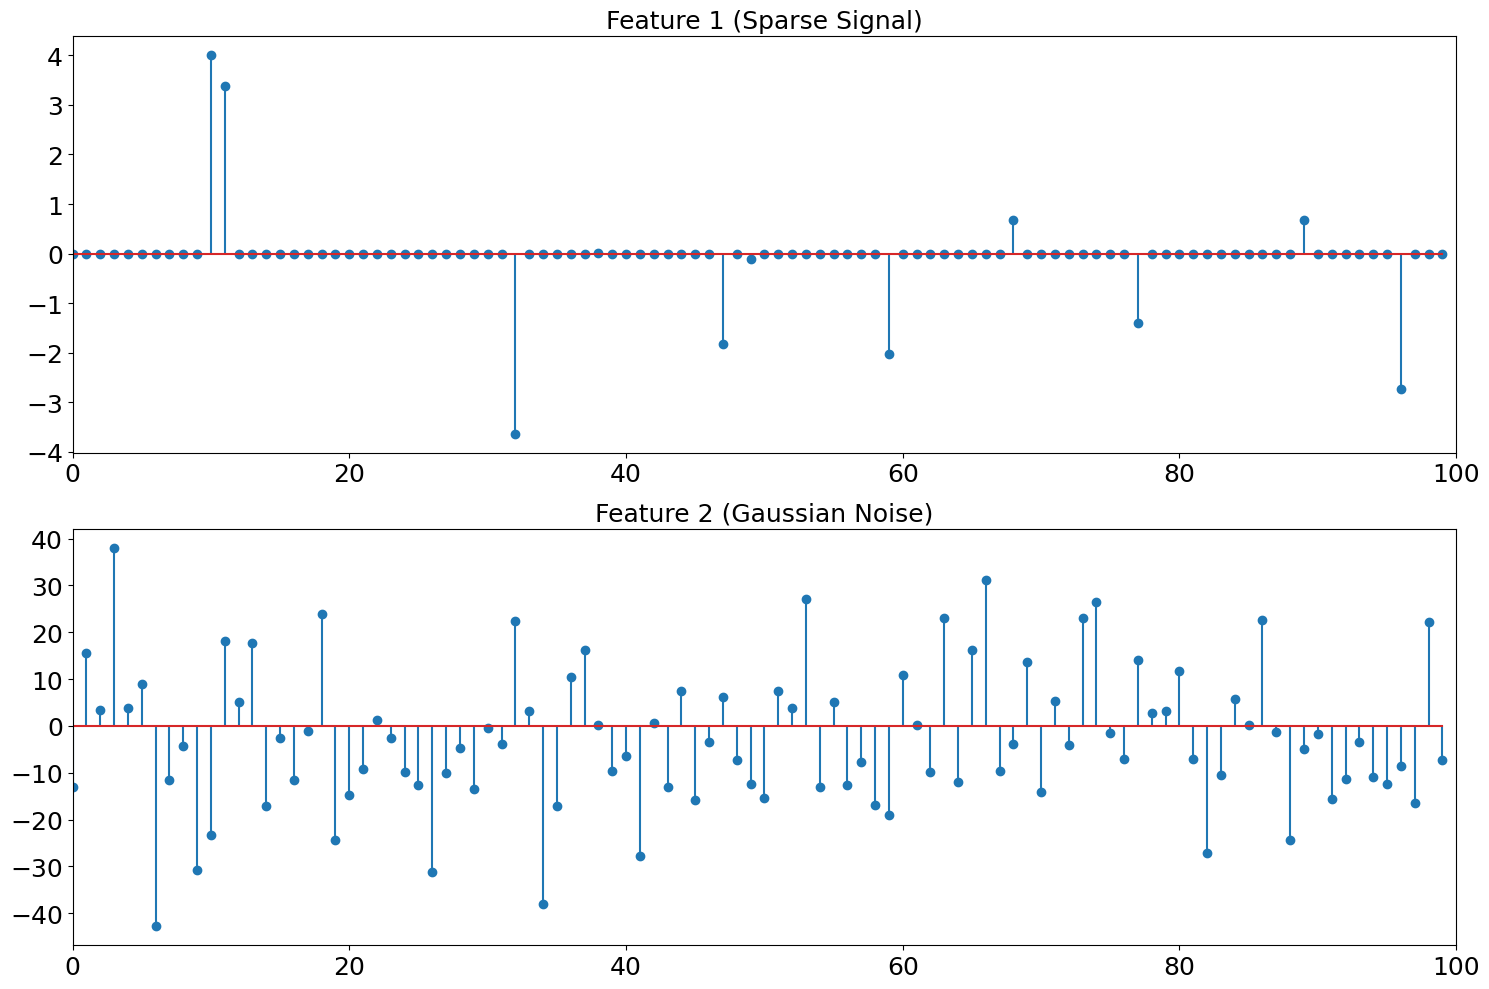

In [ ]:
#Part 01
#Generating Feature Values

# Define the signal generation function
def generate_signal(signal_length, num_nonzero):
    signal = np.zeros(signal_length)
    nonzero_indices = np.random.choice(signal_length, num_nonzero, replace=False)
    nonzero_values = 10 * np.random.randn(num_nonzero)
    signal[nonzero_indices] = nonzero_values
    return signal

# Parameters
signal_length = 100  # Total length of the signal
num_nonzero = 10  # Number of non-zero elements
your_index_no = 220735  # Replace with your index number (no letters, no leading zeros)

# Generate Feature 1: sparse_signal
sparse_signal = generate_signal(signal_length, num_nonzero)
sparse_signal[10] = (your_index_no % 10) * 2 + 10
if your_index_no % 10 == 0:
    sparse_signal[10] = np.random.randn(1) + 30
sparse_signal = sparse_signal / 5

# Generate Feature 2: epsilon (Gaussian noise)
epsilon = np.random.normal(0, 15, signal_length)

# Plot the original features
plt.figure(figsize=(15, 10))
plt.subplot(2, 1, 1)
plt.xlim(0, signal_length)
plt.title("Feature 1 (Sparse Signal)", fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.stem(sparse_signal)
plt.subplot(2, 1, 2)
plt.xlim(0, signal_length)
plt.title("Feature 2 (Gaussian Noise)", fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.stem(epsilon)
plt.tight_layout()
plt.show()

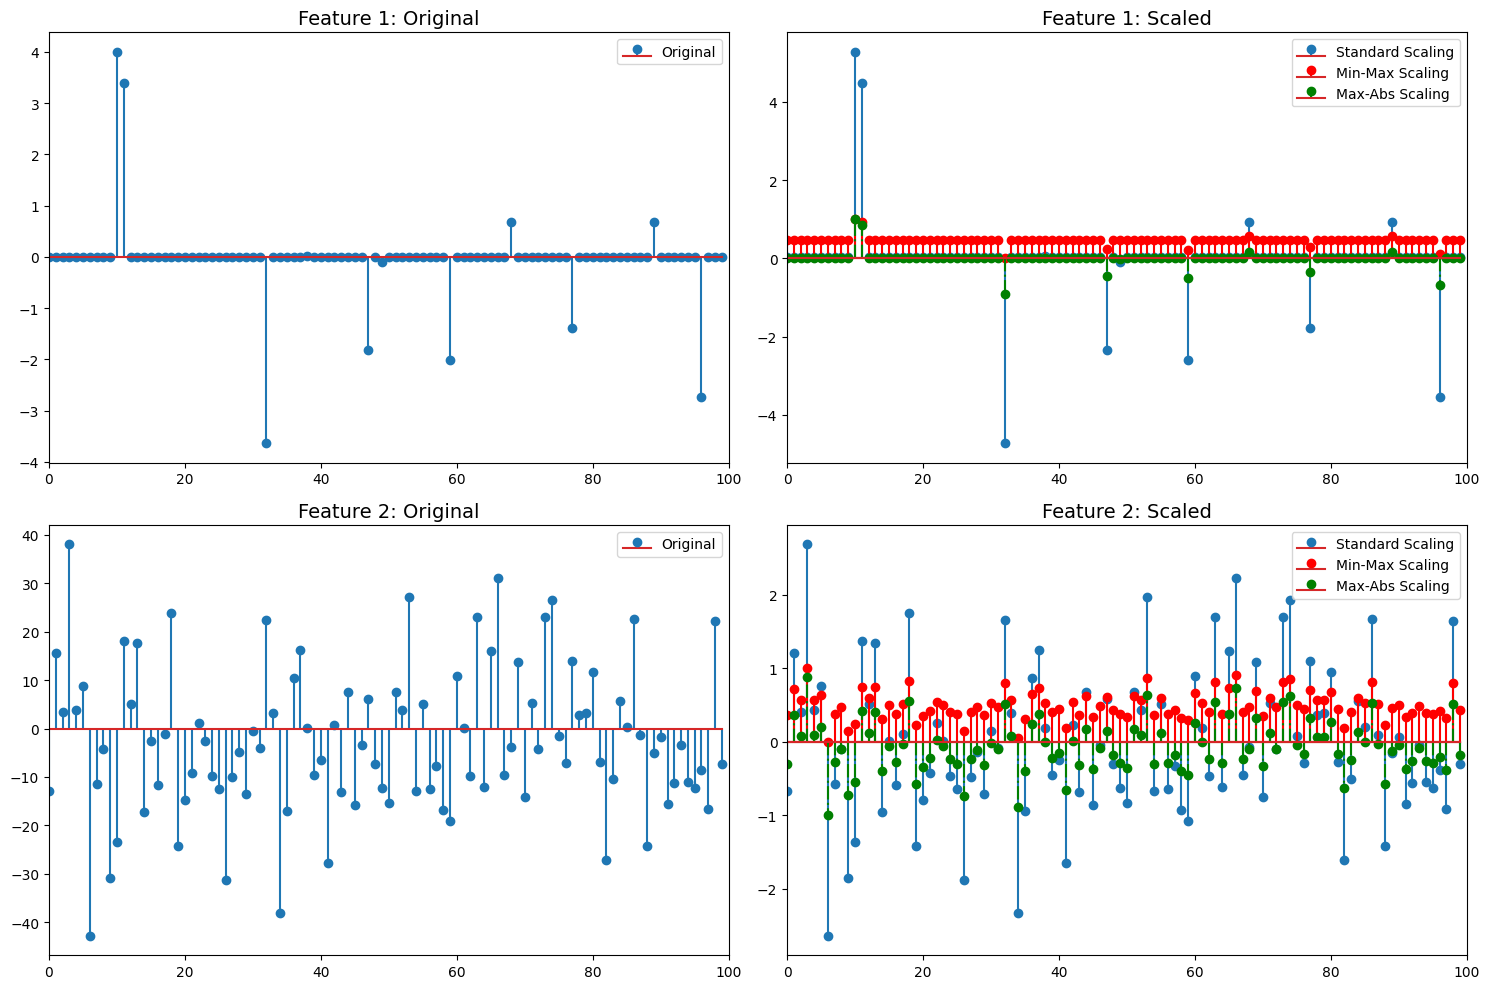

In [19]:

from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler




# Reshape for sklearn (2D arrays)
sparse_signal_reshaped = sparse_signal.reshape(-1, 1)
epsilon_reshaped = epsilon.reshape(-1, 1)

# Initialize scalers
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()
maxabs_scaler = MaxAbsScaler()

# Apply scaling
sparse_standard = standard_scaler.fit_transform(sparse_signal_reshaped)
sparse_minmax = minmax_scaler.fit_transform(sparse_signal_reshaped)
sparse_maxabs = maxabs_scaler.fit_transform(sparse_signal_reshaped)

epsilon_standard = standard_scaler.fit_transform(epsilon_reshaped)
epsilon_minmax = minmax_scaler.fit_transform(epsilon_reshaped)
epsilon_maxabs = maxabs_scaler.fit_transform(epsilon_reshaped)

# Plotting
plt.figure(figsize=(15, 10))

# Feature 1: Sparse Signal
plt.subplot(2, 2, 1)
plt.stem(sparse_signal.flatten(), label='Original')
plt.title("Feature 1: Original", fontsize=14)
plt.xlim(0, signal_length)
plt.legend()

plt.subplot(2, 2, 2)
plt.stem(sparse_standard.flatten(), label='Standard Scaling')
plt.stem(sparse_minmax.flatten(), label='Min-Max Scaling', linefmt='r-')
plt.stem(sparse_maxabs.flatten(), label='Max-Abs Scaling', linefmt='g-.')
plt.title("Feature 1: Scaled", fontsize=14)
plt.xlim(0, signal_length)
plt.legend()

# Feature 2: Gaussian Noise
plt.subplot(2, 2, 3)
plt.stem(epsilon.flatten(), label='Original')
plt.title("Feature 2: Original", fontsize=14)
plt.xlim(0, signal_length)
plt.legend()

plt.subplot(2, 2, 4)
plt.stem(epsilon_standard.flatten(), label='Standard Scaling')
plt.stem(epsilon_minmax.flatten(), label='Min-Max Scaling', linefmt='r-')
plt.stem(epsilon_maxabs.flatten(), label='Max-Abs Scaling', linefmt='g-.')
plt.title("Feature 2: Scaled", fontsize=14)
plt.xlim(0, signal_length)
plt.legend()

plt.tight_layout()
plt.show()

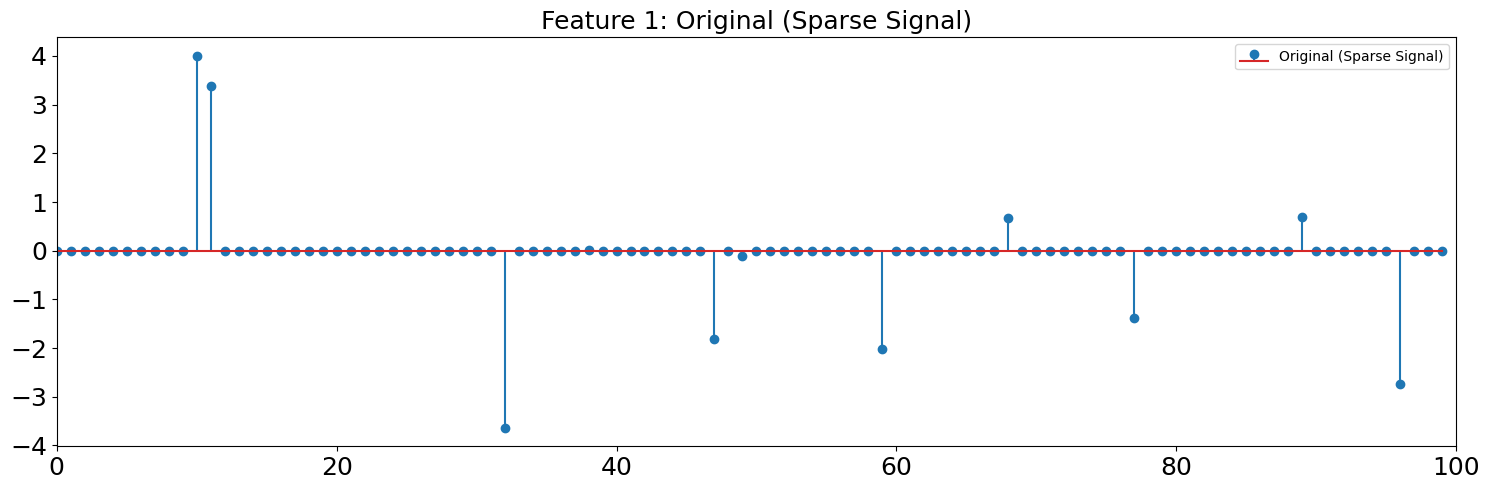

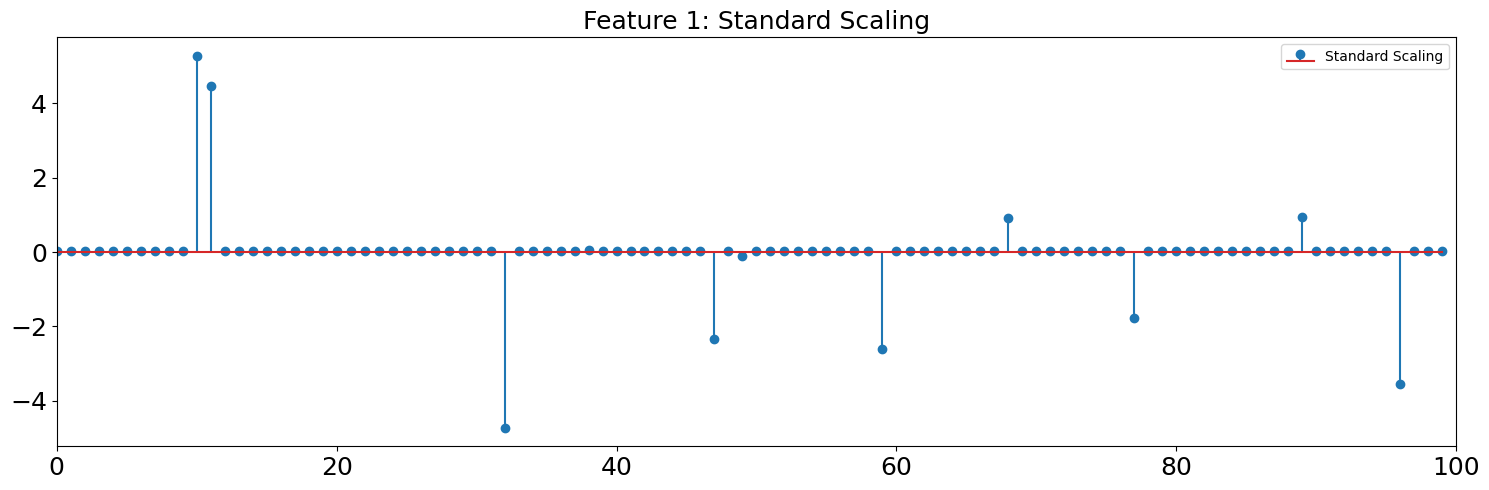

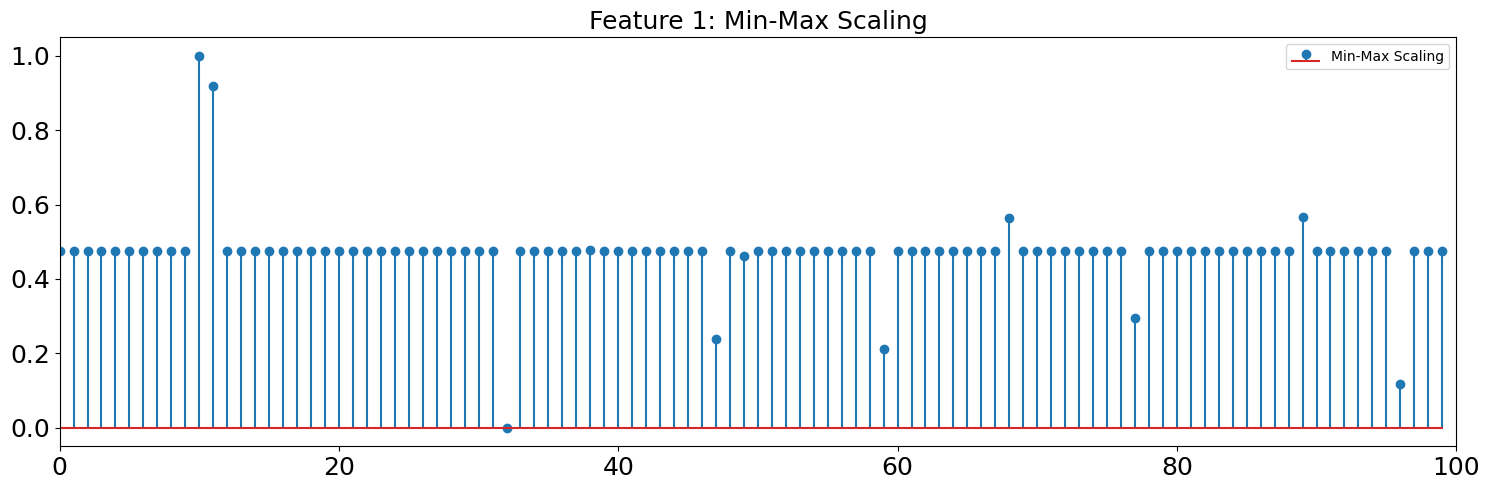

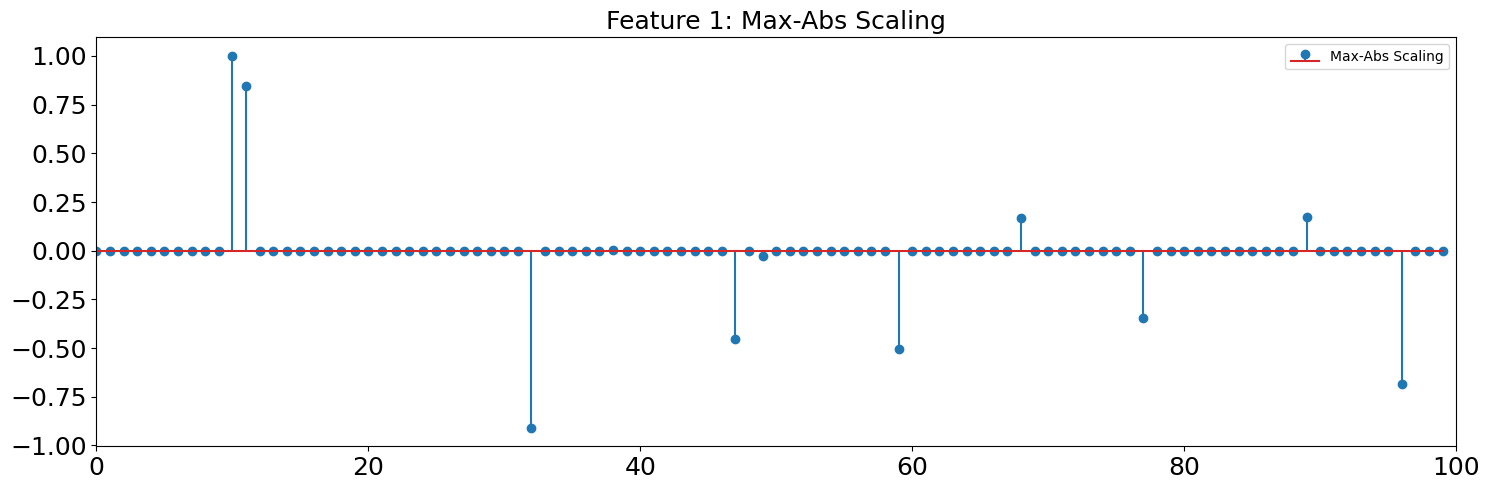

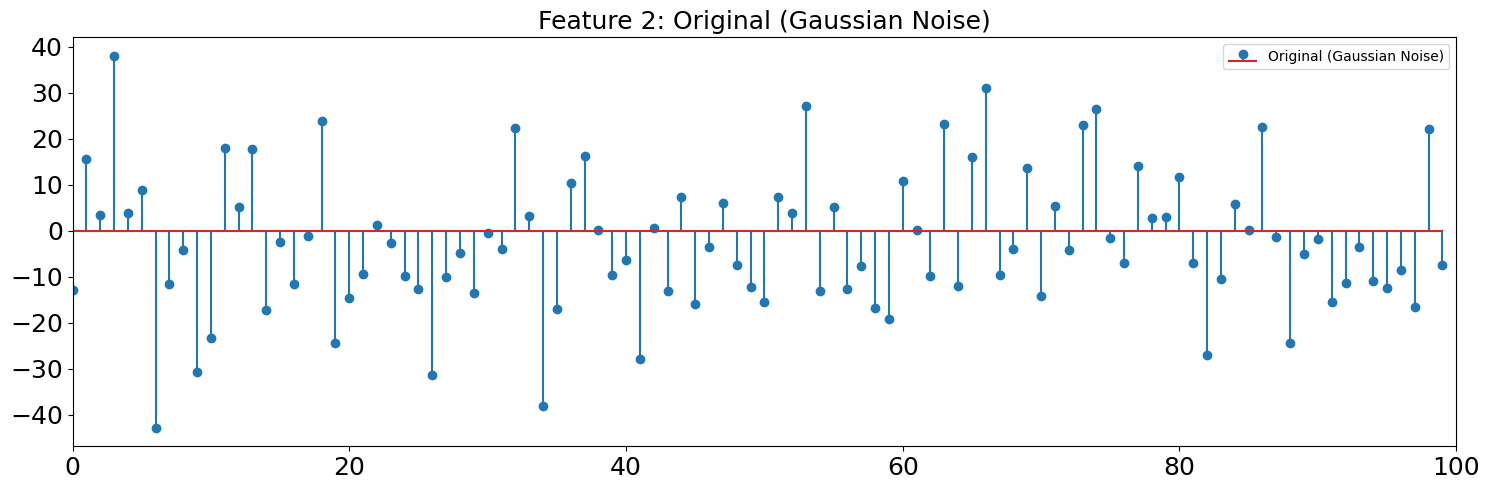

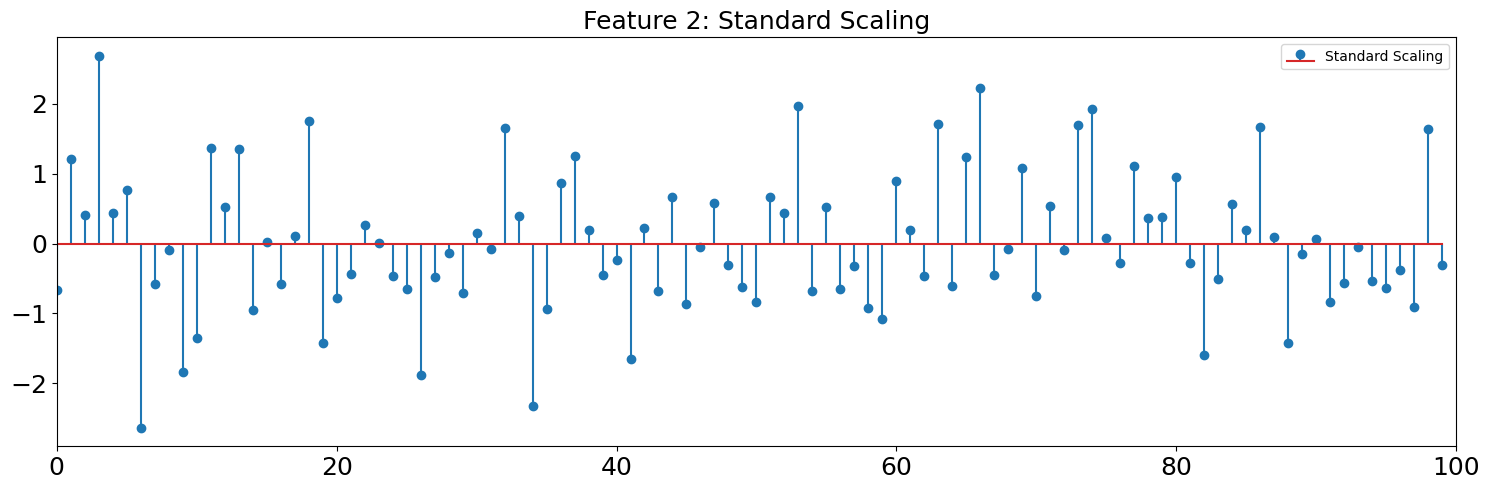

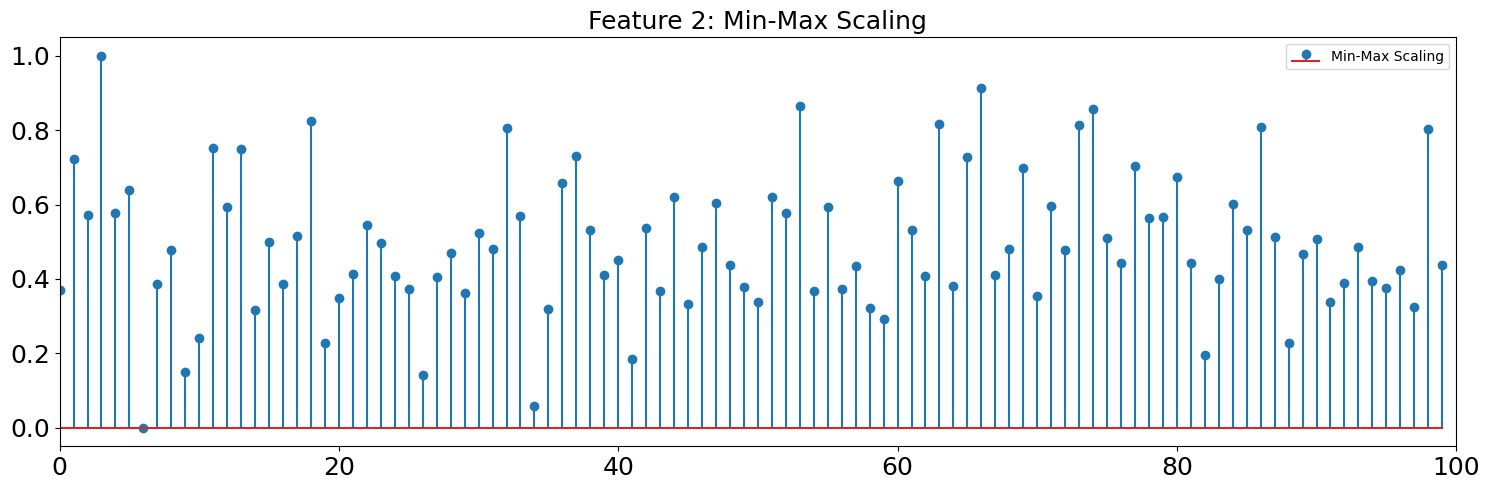

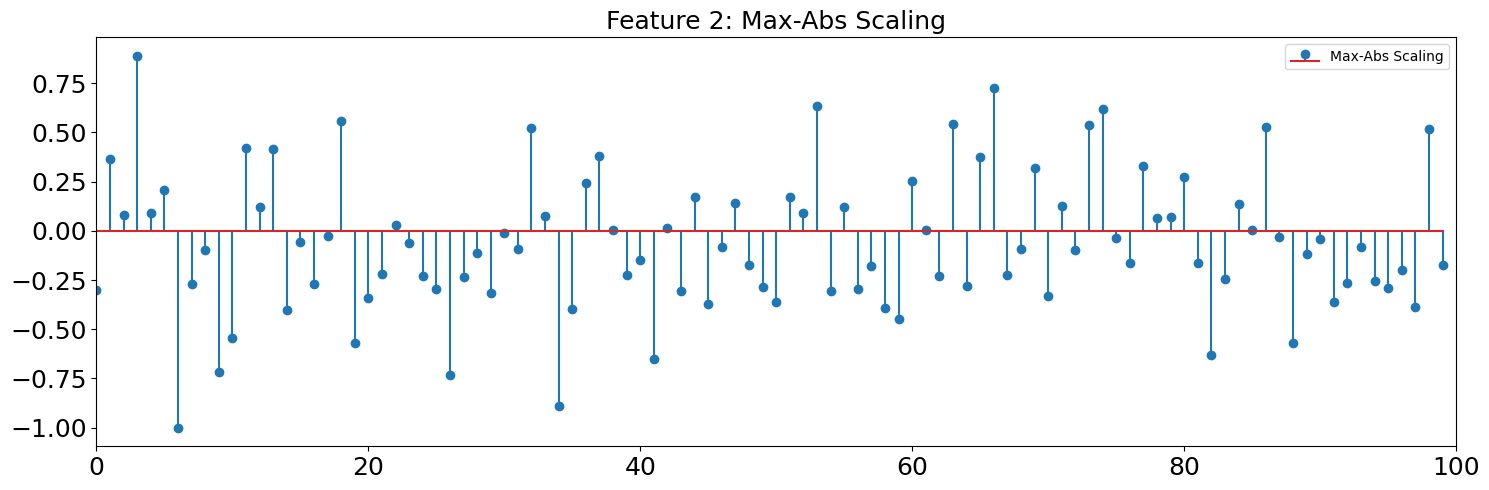

Feature 1 Statistics:
Original: mean=-0.0294, std=0.7635
Standard: mean=0.0000, std=1.0000
Min-Max: mean=0.4722, std=0.1000
Max-Abs: mean=-0.0074, std=0.1909

Feature 2 Statistics:
Original: mean=-2.7755, std=15.1807
Standard: mean=-0.0000, std=1.0000
Min-Max: mean=0.4951, std=0.1879
Max-Abs: mean=-0.0649, std=0.3548


In [ ]:



# List of plots to generate
plots = [
    ("Feature 1: Original (Sparse Signal)", sparse_signal, "feature1_original.png"),
    ("Feature 1: Standard Scaling", sparse_standard, "feature1_standard.png"),
    ("Feature 1: Min-Max Scaling", sparse_minmax, "feature1_minmax.png"),
    ("Feature 1: Max-Abs Scaling", sparse_maxabs, "feature1_maxabs.png"),
    ("Feature 2: Original (Gaussian Noise)", epsilon, "feature2_original.png"),
    ("Feature 2: Standard Scaling", epsilon_standard, "feature2_standard.png"),
    ("Feature 2: Min-Max Scaling", epsilon_minmax, "feature2_minmax.png"),
    ("Feature 2: Max-Abs Scaling", epsilon_maxabs, "feature2_maxabs.png")
]

# Generate separate plots
for title, data, filename in plots:
    plt.figure(figsize=(15, 5))
    plt.stem(data, label=title.split(": ")[1])
    plt.title(title, fontsize=18)
    plt.xlim(0, signal_length)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.legend()
    plt.tight_layout()
    plt.savefig(filename)
    plt.show()

# Print statistics for report (optional)
print("Feature 1 Statistics:")
print(f"Original: mean={np.mean(sparse_signal):.4f}, std={np.std(sparse_signal):.4f}")
print(f"Standard: mean={np.mean(sparse_standard):.4f}, std={np.std(sparse_standard):.4f}")
print(f"Min-Max: mean={np.mean(sparse_minmax):.4f}, std={np.std(sparse_minmax):.4f}")
print(f"Max-Abs: mean={np.mean(sparse_maxabs):.4f}, std={np.std(sparse_maxabs):.4f}")
print("\nFeature 2 Statistics:")
print(f"Original: mean={np.mean(epsilon):.4f}, std={np.std(epsilon):.4f}")
print(f"Standard: mean={np.mean(epsilon_standard):.4f}, std={np.std(epsilon_standard):.4f}")
print(f"Min-Max: mean={np.mean(epsilon_minmax):.4f}, std={np.std(epsilon_minmax):.4f}")
print(f"Max-Abs: mean={np.mean(epsilon_maxabs):.4f}, std={np.std(epsilon_maxabs):.4f}")